In [2]:
# load from pattern/llm_alpha_0.0.pkl
import pickle



In [3]:
import collections
def gather_pattern(data):
    all_patterns_by_instance = collections.defaultdict(set)
    for d in data:
        for instance_id, patterns in d.items():
            all_patterns_by_instance[instance_id].update(patterns)
    return all_patterns_by_instance

In [7]:
# list all file with "pattern/llm_alpha_*.pkl"
import glob
for path in glob.glob("pattern/llm_alpha_*.pkl"):
    with open(path, "rb") as f:
        data = pickle.load(f)

    for data_len in [1, 50, 100, 500, 1000]:
        all_patterns = gather_pattern(data[:data_len])
        print(f"{path} with {data_len} runs has {sum(len(v) for v in all_patterns.values())} unique patterns")

pattern/llm_alpha_0.1.pkl with 1 runs has 383 unique patterns
pattern/llm_alpha_0.1.pkl with 50 runs has 5298 unique patterns
pattern/llm_alpha_0.1.pkl with 100 runs has 7854 unique patterns
pattern/llm_alpha_0.1.pkl with 500 runs has 17456 unique patterns
pattern/llm_alpha_0.1.pkl with 1000 runs has 17456 unique patterns
pattern/llm_alpha_0.2.pkl with 1 runs has 406 unique patterns
pattern/llm_alpha_0.2.pkl with 50 runs has 5748 unique patterns
pattern/llm_alpha_0.2.pkl with 100 runs has 8587 unique patterns
pattern/llm_alpha_0.2.pkl with 500 runs has 19214 unique patterns
pattern/llm_alpha_0.2.pkl with 1000 runs has 19214 unique patterns
pattern/llm_alpha_0.0.pkl with 1 runs has 264 unique patterns
pattern/llm_alpha_0.0.pkl with 50 runs has 264 unique patterns
pattern/llm_alpha_0.0.pkl with 100 runs has 264 unique patterns
pattern/llm_alpha_0.0.pkl with 500 runs has 264 unique patterns
pattern/llm_alpha_0.0.pkl with 1000 runs has 264 unique patterns
pattern/llm_alpha_0.3.pkl with 1 r

In [20]:
import glob
import os
from utils import solve_set_partitioning_with_pulp, GetData
plot_data = {}
x_axis_runs = [1, 10, 100, 1000]
data_generator = GetData(n_instance=47)
DATA_PATH_PATTERN = "data/ssscsp/INSTANCES/Iva*.txt"
instances = data_generator.generate_instances(DATA_PATH_PATTERN)
all_truck= []

# Use your original glob logic
print("\nProcessing files and gathering data for the plot...")
for path in glob.glob("pattern/s_grasp_delta_*.pkl"):
    with open(path, "rb") as f:
        data = pickle.load(f)

    # A list to store the y-axis values (number of patterns) for this file
    y_axis_patterns = []

    for data_len in x_axis_runs:
        # Make sure we don't try to slice beyond the data's length
        subset_data = data[:data_len]
        
        all_patterns = gather_pattern(subset_data)
        num_unique_patterns = sum(len(v) for v in all_patterns.values())
        
        print(f"{path} with {data_len} runs has {num_unique_patterns} unique patterns")
        all_truck = []
        for instance_id, (instance_items, _) in enumerate(instances):
            item_demands = {item['item_id']: item['quantity'] for item in instance_items}
            solution = solve_set_partitioning_with_pulp(all_patterns.get(instance_id), item_demands)
            if solution and solution['status'] == 'Optimal':
                all_truck.append(solution['total_trucks'])

        y_axis_patterns.append((num_unique_patterns,sum(all_truck)))

    # Extract a clean name for the legend from the file path
    label = os.path.basename(path).replace('s_grasp_delta_', '').replace('.pkl', '')
    plot_data[label] = y_axis_patterns

Successfully processed 47 instances.

Processing files and gathering data for the plot...
pattern/s_grasp_delta_0.6.pkl with 1 runs has 365 unique patterns
pattern/s_grasp_delta_0.6.pkl with 10 runs has 1687 unique patterns
pattern/s_grasp_delta_0.6.pkl with 100 runs has 7032 unique patterns
pattern/s_grasp_delta_0.6.pkl with 1000 runs has 16823 unique patterns
pattern/s_grasp_delta_1.0.pkl with 1 runs has 430 unique patterns
pattern/s_grasp_delta_1.0.pkl with 10 runs has 2073 unique patterns
pattern/s_grasp_delta_1.0.pkl with 100 runs has 8511 unique patterns
pattern/s_grasp_delta_1.0.pkl with 1000 runs has 19949 unique patterns
pattern/s_grasp_delta_0.7.pkl with 1 runs has 368 unique patterns
pattern/s_grasp_delta_0.7.pkl with 10 runs has 1759 unique patterns
pattern/s_grasp_delta_0.7.pkl with 100 runs has 7427 unique patterns
pattern/s_grasp_delta_0.7.pkl with 1000 runs has 17948 unique patterns
pattern/s_grasp_delta_0.1.pkl with 1 runs has 231 unique patterns
pattern/s_grasp_delta_


Generating plot...


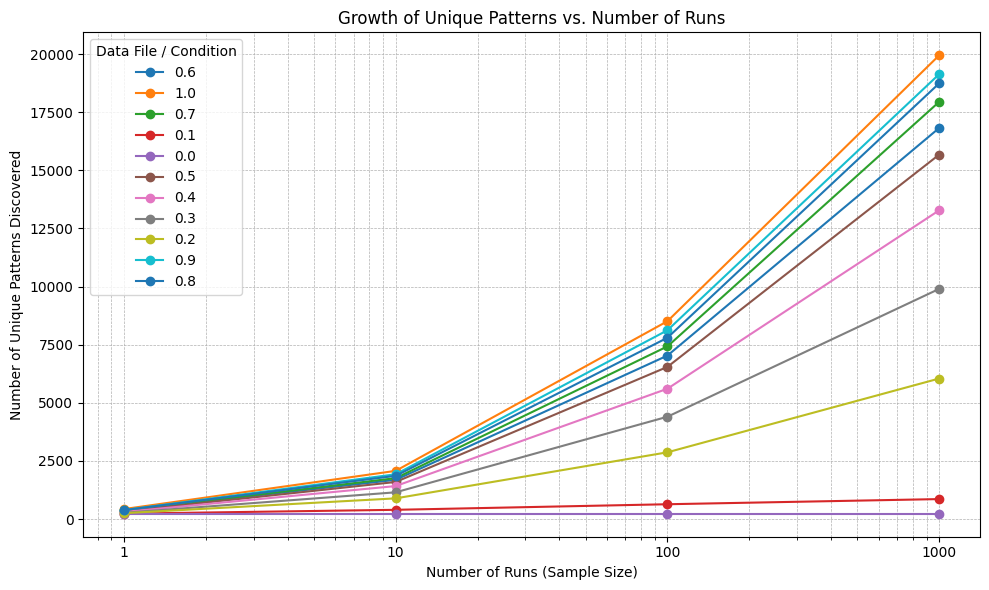

In [21]:
import matplotlib.pyplot as plt

print("\nGenerating plot...")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a separate line for each file
for label, y_values in plot_data.items():
    ax.plot(x_axis_runs, [y[0] for y in y_values], marker='o', linestyle='-', label=label)

# Set the x-axis to a logarithmic scale, which is appropriate for [1, 10, 100, 1000]
ax.set_xscale('log')

# Set labels, title, and legend
ax.set_xlabel("Number of Runs (Sample Size)")
ax.set_ylabel("Number of Unique Patterns Discovered")
ax.set_title("Growth of Unique Patterns vs. Number of Runs")
ax.legend(title="Data File / Condition")
ax.grid(True, which="both", linestyle='--', linewidth=0.5)

# Ensure the x-axis ticks are set to our specific values
ax.set_xticks(x_axis_runs)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.tight_layout()
plt.show()


Generating plot...


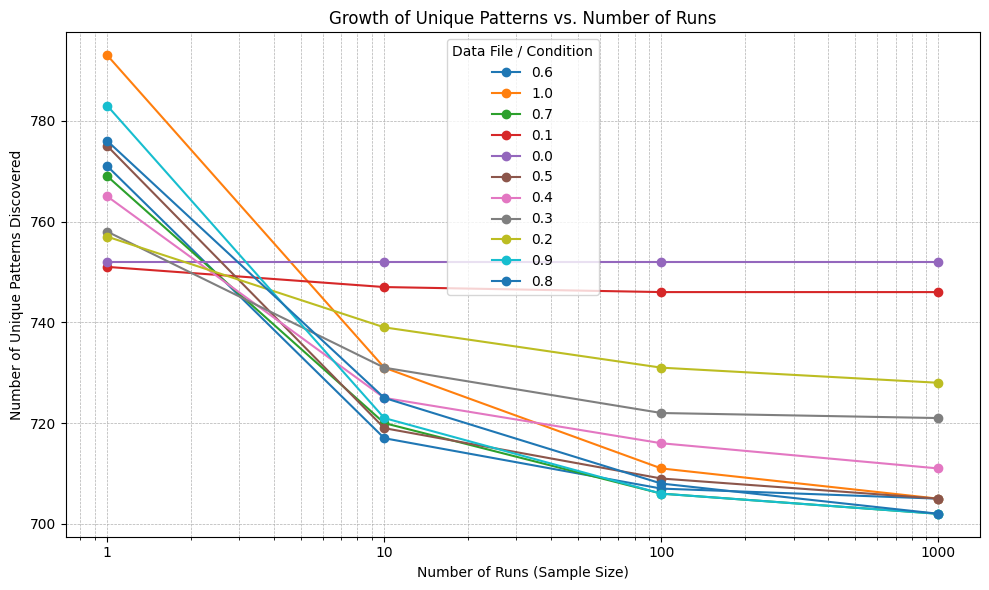

In [22]:
import matplotlib.pyplot as plt

print("\nGenerating plot...")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a separate line for each file
for label, y_values in plot_data.items():
    ax.plot(x_axis_runs, [y[1] for y in y_values], marker='o', linestyle='-', label=label)

# Set the x-axis to a logarithmic scale, which is appropriate for [1, 10, 100, 1000]
ax.set_xscale('log')

# Set labels, title, and legend
ax.set_xlabel("Number of Runs (Sample Size)")
ax.set_ylabel("Number of Unique Patterns Discovered")
ax.set_title("Growth of Unique Patterns vs. Number of Runs")
ax.legend(title="Data File / Condition")
ax.grid(True, which="both", linestyle='--', linewidth=0.5)

# Ensure the x-axis ticks are set to our specific values
ax.set_xticks(x_axis_runs)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.tight_layout()
plt.show()

In [23]:
import glob
import os
from utils import solve_set_partitioning_with_pulp, GetData
plot_data = {}
x_axis_runs = [1, 10, 100, 1000]
data_generator = GetData(n_instance=47)
DATA_PATH_PATTERN = "data/ssscsp/INSTANCES/Iva*.txt"
instances = data_generator.generate_instances(DATA_PATH_PATTERN)
all_truck= []

# Use your original glob logic
print("\nProcessing files and gathering data for the plot...")
for path in glob.glob("pattern/llm_alpha_*.pkl"):
    with open(path, "rb") as f:
        data = pickle.load(f)

    # A list to store the y-axis values (number of patterns) for this file
    y_axis_patterns = []

    for data_len in x_axis_runs:
        # Make sure we don't try to slice beyond the data's length
        subset_data = data[:data_len]
        
        all_patterns = gather_pattern(subset_data)
        num_unique_patterns = sum(len(v) for v in all_patterns.values())
        
        print(f"{path} with {data_len} runs has {num_unique_patterns} unique patterns")
        all_truck = []
        for instance_id, (instance_items, _) in enumerate(instances):
            item_demands = {item['item_id']: item['quantity'] for item in instance_items}
            solution = solve_set_partitioning_with_pulp(all_patterns.get(instance_id), item_demands)
            if solution and solution['status'] == 'Optimal':
                all_truck.append(solution['total_trucks'])

        y_axis_patterns.append((num_unique_patterns,sum(all_truck)))

    # Extract a clean name for the legend from the file path
    label = os.path.basename(path).replace('s_grasp_delta_', '').replace('.pkl', '')
    plot_data[label] = y_axis_patterns

Successfully processed 47 instances.

Processing files and gathering data for the plot...
pattern/llm_alpha_0.9.pkl with 1 runs has 523 unique patterns
pattern/llm_alpha_0.9.pkl with 10 runs has 2744 unique patterns
pattern/llm_alpha_0.9.pkl with 100 runs has 11235 unique patterns
pattern/llm_alpha_0.9.pkl with 1000 runs has 24898 unique patterns
pattern/llm_alpha_1.0.pkl with 1 runs has 585 unique patterns
pattern/llm_alpha_1.0.pkl with 10 runs has 3039 unique patterns
pattern/llm_alpha_1.0.pkl with 100 runs has 11454 unique patterns
pattern/llm_alpha_1.0.pkl with 1000 runs has 24009 unique patterns
pattern/llm_alpha_0.1.pkl with 1 runs has 383 unique patterns
pattern/llm_alpha_0.1.pkl with 10 runs has 1933 unique patterns
pattern/llm_alpha_0.1.pkl with 100 runs has 7854 unique patterns
pattern/llm_alpha_0.1.pkl with 1000 runs has 17456 unique patterns
pattern/llm_alpha_0.2.pkl with 1 runs has 406 unique patterns
pattern/llm_alpha_0.2.pkl with 10 runs has 2088 unique patterns
pattern/


Generating plot...


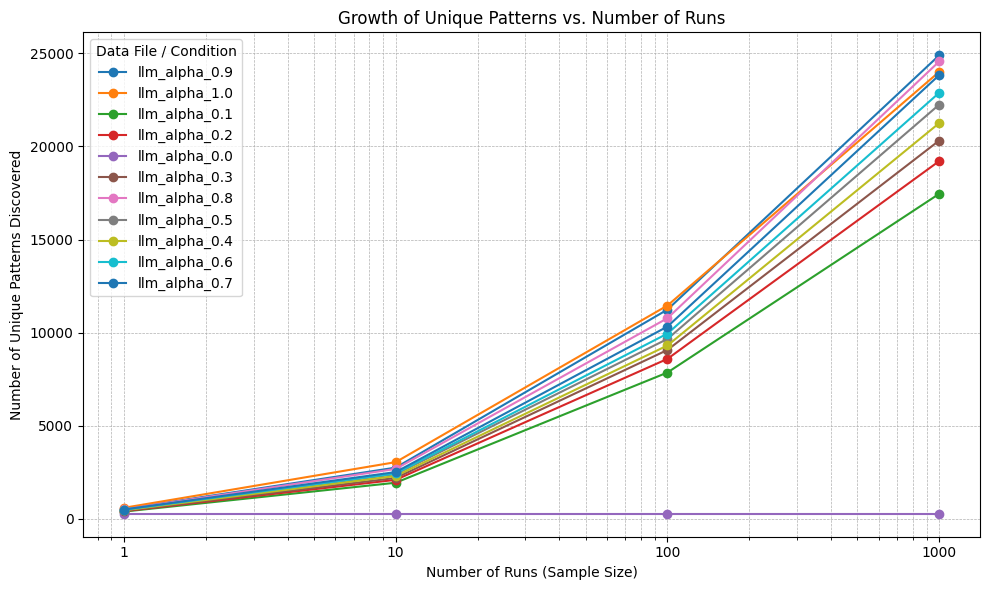

In [25]:
import matplotlib.pyplot as plt

print("\nGenerating plot...")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a separate line for each file
for label, y_values in plot_data.items():
    ax.plot(x_axis_runs, [y[0] for y in y_values], marker='o', linestyle='-', label=label)

# Set the x-axis to a logarithmic scale, which is appropriate for [1, 10, 100, 1000]
ax.set_xscale('log')

# Set labels, title, and legend
ax.set_xlabel("Number of Runs (Sample Size)")
ax.set_ylabel("Number of Unique Patterns Discovered")
ax.set_title("Growth of Unique Patterns vs. Number of Runs")
ax.legend(title="Data File / Condition")
ax.grid(True, which="both", linestyle='--', linewidth=0.5)

# Ensure the x-axis ticks are set to our specific values
ax.set_xticks(x_axis_runs)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.tight_layout()
plt.show()


Generating plot...


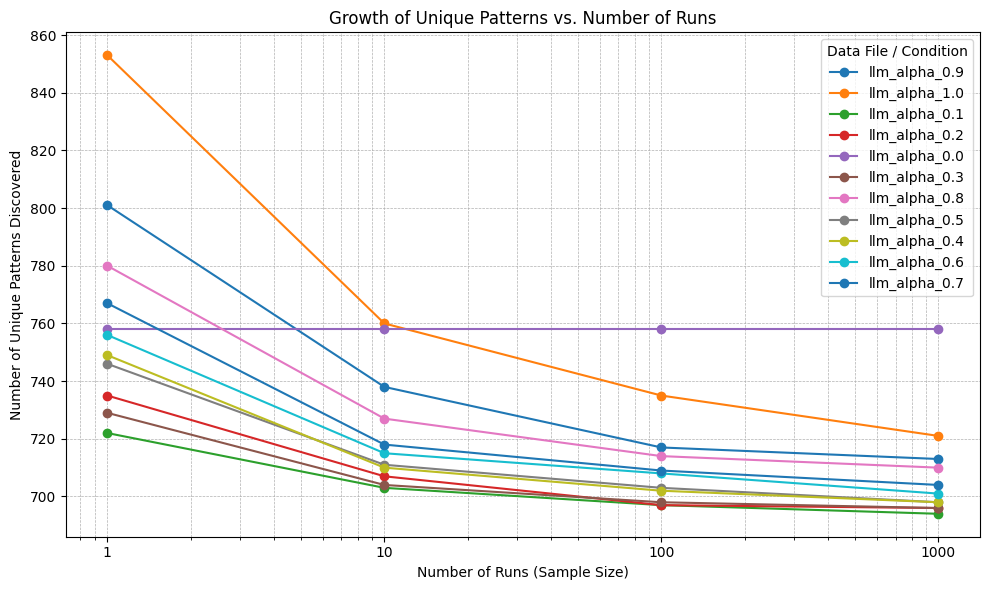

In [24]:
import matplotlib.pyplot as plt

print("\nGenerating plot...")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a separate line for each file
for label, y_values in plot_data.items():
    ax.plot(x_axis_runs, [y[1] for y in y_values], marker='o', linestyle='-', label=label)

# Set the x-axis to a logarithmic scale, which is appropriate for [1, 10, 100, 1000]
ax.set_xscale('log')

# Set labels, title, and legend
ax.set_xlabel("Number of Runs (Sample Size)")
ax.set_ylabel("Number of Unique Patterns Discovered")
ax.set_title("Growth of Unique Patterns vs. Number of Runs")
ax.legend(title="Data File / Condition")
ax.grid(True, which="both", linestyle='--', linewidth=0.5)

# Ensure the x-axis ticks are set to our specific values
ax.set_xticks(x_axis_runs)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.tight_layout()
plt.show()

In [28]:
import glob
import os
from utils import solve_set_partitioning_with_pulp, GetData
x_axis_runs = [200]
data_generator = GetData(n_instance=47)
DATA_PATH_PATTERN = "data/ssscsp/INSTANCES/Iva*.txt"
instances = data_generator.generate_instances(DATA_PATH_PATTERN)

# Use your original glob logic
print("\nProcessing files and gathering data for the plot...")
for seed in range(3):
    for data_len in x_axis_runs:
        all_data=[]
        for path in glob.glob(f"pattern/seed{seed}/llm_alpha_0.05.pkl")+glob.glob(f"pattern/seed{seed}/llm_alpha_0.0.pkl")+glob.glob(f"pattern/seed{seed}/llm_alpha_0.15.pkl"):
            with open(path, "rb") as f:
                data = pickle.load(f)

            # A list to store the y-axis values (number of patterns) for this file
            y_axis_patterns = []
            subset_data = data[:data_len]
            all_data.extend(subset_data)
        all_patterns = gather_pattern(all_data)
        num_unique_patterns = sum(len(v) for v in all_patterns.values())
            
        print(f"Seed {seed} with {data_len} runs has {num_unique_patterns} unique patterns")
        all_truck = []
        for instance_id, (instance_items, _) in enumerate(instances):
            item_demands = {item['item_id']: item['quantity'] for item in instance_items}
            solution = solve_set_partitioning_with_pulp(all_patterns.get(instance_id), item_demands)
            if solution and solution['status'] == 'Optimal':
                all_truck.append(solution['total_trucks'])
        print(all_truck)
        print(sum(all_truck))


Successfully processed 47 instances.

Processing files and gathering data for the plot...
Seed 0 with 200 runs has 16168 unique patterns
[25, 10, 19, 26, 51, 10, 16, 4, 19, 55, 16, 53, 25, 27, 11, 26, 7, 2, 3, 5, 20, 8, 19, 5, 5, 3, 5, 9, 17, 22, 12, 4, 5, 8, 3, 14, 23, 45, 15, 8, 15, 4, 3, 4, 3, 2, 4]
695
Seed 1 with 200 runs has 16176 unique patterns
[25, 10, 19, 26, 51, 10, 16, 4, 19, 55, 16, 53, 25, 27, 11, 26, 7, 2, 3, 5, 20, 8, 19, 5, 5, 3, 5, 9, 17, 22, 12, 4, 5, 8, 3, 14, 23, 45, 15, 8, 15, 4, 3, 4, 3, 2, 3]
694
Seed 2 with 200 runs has 16228 unique patterns
[25, 10, 19, 26, 51, 10, 16, 4, 19, 55, 16, 53, 25, 27, 11, 26, 7, 2, 3, 5, 20, 8, 19, 5, 5, 3, 5, 9, 17, 22, 12, 4, 5, 8, 3, 14, 23, 45, 15, 8, 15, 4, 3, 4, 3, 2, 3]
694


In [36]:
import glob
import pickle
from utils import solve_set_partitioning_with_pulp, GetData
x_axis_runs = [500]
data_generator = GetData(n_instance=47)
DATA_PATH_PATTERN = "data/ssscsp/INSTANCES/Iva*.txt"
instances = data_generator.generate_instances(DATA_PATH_PATTERN)

# Use your original glob logic
print("\nProcessing files and gathering data for the plot...")
for seed in range(3):
    for data_len in x_axis_runs:
        all_data=[]
        for path in glob.glob(f"pattern/sup/seed{seed}/llm_alpha_*.pkl"):
            with open(path, "rb") as f:
                data = pickle.load(f)

            # A list to store the y-axis values (number of patterns) for this file
            y_axis_patterns = []
            subset_data = data[:data_len]
            all_data.extend(subset_data)
        all_patterns = gather_pattern(all_data)
        num_unique_patterns = sum(len(v) for v in all_patterns.values())
            
        print(f"Seed {seed} with {data_len} runs has {num_unique_patterns} unique patterns")
        all_truck = []
        for instance_id, (instance_items, _) in enumerate(instances):
            item_demands = {item['item_id']: item['quantity'] for item in instance_items}
            solution = solve_set_partitioning_with_pulp(all_patterns.get(instance_id), item_demands)
            if solution and solution['status'] == 'Optimal':
                all_truck.append(solution['total_trucks'])
        print(all_truck)
        print(sum(all_truck))


Successfully processed 47 instances.

Processing files and gathering data for the plot...
Seed 0 with 500 runs has 29001 unique patterns
[25, 10, 19, 26, 51, 10, 16, 4, 19, 55, 16, 53, 25, 27, 11, 26, 8, 2, 3, 5, 20, 9, 20, 6, 5, 3, 5, 10, 17, 22, 12, 4, 5, 8, 3, 14, 23, 45, 15, 8, 15, 4, 3, 4, 3, 2, 4]
700
Seed 1 with 500 runs has 28984 unique patterns
[25, 10, 19, 26, 51, 10, 16, 4, 19, 55, 16, 53, 25, 27, 11, 26, 7, 2, 3, 5, 20, 9, 20, 6, 5, 3, 5, 10, 17, 22, 13, 4, 5, 8, 3, 14, 23, 45, 15, 8, 15, 5, 3, 4, 3, 2, 3]
700
Seed 2 with 500 runs has 28846 unique patterns
[25, 10, 19, 26, 51, 10, 16, 4, 19, 55, 16, 53, 25, 27, 11, 26, 8, 2, 3, 5, 20, 9, 20, 6, 5, 3, 5, 10, 17, 22, 13, 4, 5, 8, 3, 14, 23, 45, 15, 8, 15, 5, 3, 4, 3, 2, 4]
702


In [15]:
import glob
import pickle
from utils import solve_set_partitioning_with_pulp, GetData
x_axis_runs = [100,200,500]
data_generator = GetData(n_instance=47)
DATA_PATH_PATTERN = "data/ssscsp/INSTANCES/Iva*.txt"
instances = data_generator.generate_instances(DATA_PATH_PATTERN)

# Use your original glob logic
print("\nProcessing files and gathering data for the plot...")
for seed in range(3):
    for data_len in x_axis_runs:
        all_data=[]
        for path in glob.glob(f"pattern/all/seed{seed}/llm_alpha_0.1.pkl")+glob.glob(f"pattern/sup/seed{seed}/llm_alpha_0.0.pkl"):
            with open(path, "rb") as f:
                data = pickle.load(f)

            # A list to store the y-axis values (number of patterns) for this file
            y_axis_patterns = []
            subset_data = data[:data_len]
            all_data.extend(subset_data)
        all_patterns = gather_pattern(all_data)
        num_unique_patterns = sum(len(v) for v in all_patterns.values())
            
        print(f"Seed {seed} with {data_len} runs has {num_unique_patterns} unique patterns")
        all_truck = []
        for instance_id, (instance_items, _) in enumerate(instances):
            item_demands = {item['item_id']: item['quantity'] for item in instance_items}
            solution = solve_set_partitioning_with_pulp(all_patterns.get(instance_id), item_demands)
            if solution and solution['status'] == 'Optimal':
                all_truck.append(solution['total_trucks'])
        print(all_truck)
        print(sum(all_truck))


Successfully processed 47 instances.

Processing files and gathering data for the plot...
Seed 0 with 100 runs has 3065 unique patterns
[25, 10, 23, 27, 51, 10, 16, 4, 21, 55, 16, 55, 27, 27, 13, 33, 10, 2, 3, 5, 23, 9, 21, 6, 5, 4, 5, 11, 19, 26, 13, 4, 5, 9, 3, 14, 23, 45, 17, 9, 21, 5, 4, 4, 3, 2, 4]
747
Seed 0 with 200 runs has 3776 unique patterns
[25, 10, 23, 27, 51, 10, 16, 4, 21, 55, 16, 55, 27, 27, 13, 33, 10, 2, 3, 5, 23, 9, 21, 6, 5, 4, 5, 11, 19, 26, 13, 4, 5, 9, 3, 14, 23, 45, 17, 9, 21, 5, 4, 4, 3, 2, 4]
747
Seed 0 with 500 runs has 4821 unique patterns
[25, 10, 23, 27, 51, 10, 16, 4, 21, 55, 16, 55, 27, 27, 13, 33, 10, 2, 3, 5, 23, 9, 21, 6, 5, 4, 5, 11, 19, 26, 13, 4, 5, 9, 3, 14, 23, 45, 17, 9, 21, 5, 4, 4, 3, 2, 4]
747
Seed 1 with 100 runs has 215 unique patterns
[25, 10, 23, 27, 51, 10, 16, 4, 22, 55, 18, 56, 27, 27, 14, 33, 10, 2, 3, 5, 25, 11, 21, 7, 5, 4, 5, 12, 21, 28, 14, 4, 5, 11, 3, 14, 23, 45, 18, 12, 23, 5, 4, 4, 3, 2, 4]
771
Seed 1 with 200 runs has 215 uni

In [33]:
import glob
import pickle
from utils import solve_set_partitioning_with_pulp, GetData
x_axis_runs = [100,500]
data_generator = GetData(n_instance=47)
DATA_PATH_PATTERN = "data/ssscsp/INSTANCES/Iva*.txt"
instances = data_generator.generate_instances(DATA_PATH_PATTERN)

# Use your original glob logic
print("\nProcessing files and gathering data for the plot...")
for seed in range(3):
    for data_len in x_axis_runs:
        all_data=[]
        for path in glob.glob(f"pattern/sep/seed{seed}/llm_alpha_*.pkl"):
            with open(path, "rb") as f:
                data = pickle.load(f)

            # A list to store the y-axis values (number of patterns) for this file
            y_axis_patterns = []
            subset_data = data[:data_len]
            all_data.extend(subset_data)
        all_patterns = gather_pattern(all_data)
        num_unique_patterns = sum(len(v) for v in all_patterns.values())
            
        print(f"Seed {seed} with {data_len} runs has {num_unique_patterns} unique patterns")
        all_truck = []
        for instance_id, (instance_items, _) in enumerate(instances):
            item_demands = {item['item_id']: item['quantity'] for item in instance_items}
            solution = solve_set_partitioning_with_pulp(all_patterns.get(instance_id), item_demands)
            if solution and solution['status'] == 'Optimal':
                all_truck.append(solution['total_trucks'])
        print(all_truck)
        print(sum(all_truck))


Successfully processed 47 instances.

Processing files and gathering data for the plot...
Seed 0 with 100 runs has 5524 unique patterns
[27, 11, 21, 29, 52, 11, 16, 5, 19, 55, 19, 56, 25, 29, 12, 26, 9, 3, 3, 5, 21, 9, 20, 6, 6, 4, 5, 10, 17, 25, 13, 4, 5, 9, 3, 19, 23, 45, 15, 10, 17, 5, 4, 4, 3, 2, 4]
741
Seed 0 with 500 runs has 10214 unique patterns
[27, 11, 21, 29, 52, 11, 16, 5, 19, 55, 19, 56, 25, 28, 12, 26, 9, 2, 3, 5, 21, 9, 20, 6, 6, 4, 5, 10, 17, 25, 13, 4, 5, 9, 3, 19, 23, 45, 15, 9, 17, 5, 4, 4, 3, 2, 4]
738
Seed 1 with 100 runs has 5597 unique patterns
[27, 11, 21, 29, 52, 11, 16, 5, 19, 55, 19, 56, 25, 28, 12, 26, 9, 2, 3, 5, 21, 9, 21, 6, 6, 4, 5, 10, 17, 25, 13, 4, 5, 9, 3, 19, 23, 45, 15, 10, 17, 5, 4, 4, 3, 2, 4]
740
Seed 1 with 500 runs has 10342 unique patterns
[27, 11, 21, 29, 52, 11, 16, 5, 19, 55, 19, 56, 25, 28, 12, 26, 9, 2, 3, 5, 21, 9, 20, 6, 6, 4, 5, 10, 17, 25, 13, 4, 5, 9, 3, 19, 23, 45, 15, 9, 17, 5, 3, 4, 3, 2, 4]
737
Seed 2 with 100 runs has 5568 uniq

In [11]:
import glob
import pickle
from utils import solve_set_partitioning_with_pulp, GetData
x_axis_runs = [500]
data_generator = GetData(n_instance=47)
DATA_PATH_PATTERN = "data/ssscsp/INSTANCES/Iva*.txt"
instances = data_generator.generate_instances(DATA_PATH_PATTERN)

# Use your original glob logic
print("\nProcessing files and gathering data for the plot...")
for seed in range(3):
    for data_len in x_axis_runs:
        all_data=[]
        for path in glob.glob(f"pattern/all/seed{seed}/llm_alpha_*.pkl"):
            with open(path, "rb") as f:
                data = pickle.load(f)

            # A list to store the y-axis values (number of patterns) for this file
            y_axis_patterns = []
            subset_data = data[:data_len]
            all_data.extend(subset_data)
        all_patterns = gather_pattern(all_data)
        num_unique_patterns = sum(len(v) for v in all_patterns.values())
            
        print(f"Seed {seed} with {data_len} runs has {num_unique_patterns} unique patterns")
        all_truck = []
        for instance_id, (instance_items, _) in enumerate(instances):
            item_demands = {item['item_id']: item['quantity'] for item in instance_items}
            solution = solve_set_partitioning_with_pulp(all_patterns.get(instance_id), item_demands)
            if solution and solution['status'] == 'Optimal':
                all_truck.append(solution['total_trucks'])
        print(all_truck)
        print(sum(all_truck))


Successfully processed 47 instances.

Processing files and gathering data for the plot...
Seed 0 with 500 runs has 8190 unique patterns
[27, 11, 22, 29, 51, 10, 16, 4, 21, 55, 17, 56, 25, 29, 13, 29, 10, 2, 3, 5, 23, 9, 20, 6, 5, 4, 5, 11, 18, 25, 13, 4, 5, 9, 3, 18, 23, 45, 17, 9, 18, 5, 3, 4, 3, 2, 4]
746
Seed 1 with 500 runs has 8188 unique patterns
[27, 11, 22, 29, 51, 10, 16, 4, 21, 55, 17, 56, 25, 29, 13, 29, 10, 2, 3, 5, 23, 9, 20, 6, 5, 4, 5, 11, 18, 25, 13, 4, 5, 9, 3, 18, 23, 45, 17, 9, 18, 5, 3, 4, 3, 2, 4]
746
Seed 2 with 500 runs has 8231 unique patterns
[27, 11, 22, 29, 51, 10, 16, 4, 21, 55, 17, 56, 25, 29, 13, 29, 10, 2, 3, 5, 23, 9, 20, 6, 5, 4, 5, 11, 18, 25, 13, 4, 5, 9, 3, 18, 23, 45, 17, 9, 18, 5, 3, 4, 3, 2, 4]
746


In [20]:
import glob
import os
from utils import solve_set_partitioning_with_pulp, GetData
x_axis_runs = [500]
data_generator = GetData(n_instance=47)
DATA_PATH_PATTERN = "data/ssscsp/INSTANCES/Iva*.txt"
instances = data_generator.generate_instances(DATA_PATH_PATTERN)

# Use your original glob logic
print("\nProcessing files and gathering data for the plot...")
for seed in range(3):
    for data_len in x_axis_runs:
        all_data=[]
        for path in glob.glob(f"pattern/seed{seed}/s_grasp_delta_*.pkl"):
            with open(path, "rb") as f:
                data = pickle.load(f)

            # A list to store the y-axis values (number of patterns) for this file
            y_axis_patterns = []
            subset_data = data[:data_len]
            all_data.extend(subset_data)
        all_patterns = gather_pattern(all_data)
        num_unique_patterns = sum(len(v) for v in all_patterns.values())
            
        print(f"{path} with {data_len} runs has {num_unique_patterns} unique patterns")
        all_truck = []
        for instance_id, (instance_items, _) in enumerate(instances):
            item_demands = {item['item_id']: item['quantity'] for item in instance_items}
            solution = solve_set_partitioning_with_pulp(all_patterns.get(instance_id), item_demands)
            if solution and solution['status'] == 'Optimal':
                all_truck.append(solution['total_trucks'])
        print(all_truck)
        print(sum(all_truck))


Successfully processed 47 instances.

Processing files and gathering data for the plot...
pattern/seed0/s_grasp_delta_0.8.pkl with 500 runs has 51973 unique patterns
[25, 10, 19, 26, 51, 10, 16, 4, 19, 55, 19, 53, 25, 27, 11, 26, 7, 2, 3, 5, 20, 9, 20, 5, 5, 3, 5, 10, 17, 23, 12, 4, 5, 8, 2, 14, 23, 45, 15, 8, 15, 4, 3, 3, 3, 2, 3]
699
pattern/seed1/s_grasp_delta_0.8.pkl with 500 runs has 52346 unique patterns
[25, 10, 19, 26, 51, 10, 16, 4, 19, 55, 19, 53, 25, 27, 11, 26, 7, 2, 3, 5, 20, 9, 20, 5, 5, 3, 5, 10, 17, 23, 12, 4, 5, 8, 2, 14, 23, 45, 15, 9, 15, 4, 3, 3, 3, 2, 3]
700
pattern/seed2/s_grasp_delta_0.8.pkl with 500 runs has 51965 unique patterns
[25, 10, 19, 26, 51, 10, 16, 4, 19, 55, 19, 53, 25, 27, 11, 26, 7, 2, 3, 5, 20, 9, 20, 5, 5, 3, 5, 10, 17, 23, 12, 4, 5, 8, 2, 14, 23, 45, 15, 9, 15, 4, 3, 3, 3, 2, 3]
700


In [9]:
import glob
import os
from utils import solve_set_partitioning_with_pulp, GetData
x_axis_runs = [100, 1000, 10000]
data_generator = GetData(n_instance=47)
DATA_PATH_PATTERN = "data/ssscsp/INSTANCES/Iva*.txt"
instances = data_generator.generate_instances(DATA_PATH_PATTERN)

# Use your original glob logic
print("\nProcessing files and gathering data for the plot...")
for seed in range(3):
    for data_len in x_axis_runs:
        all_data=[]
        for path in glob.glob(f"pattern/seed{seed}/random.pkl"):
            with open(path, "rb") as f:
                data = pickle.load(f)

            # A list to store the y-axis values (number of patterns) for this file
            y_axis_patterns = []
            subset_data = data[:data_len]
            all_data.extend(subset_data)
        all_patterns = gather_pattern(all_data)
        num_unique_patterns = sum(len(v) for v in all_patterns.values())
            
        print(f"{path} with {data_len} runs has {num_unique_patterns} unique patterns")
        all_truck = []
        for instance_id, (instance_items, _) in enumerate(instances):
            item_demands = {item['item_id']: item['quantity'] for item in instance_items}
            solution = solve_set_partitioning_with_pulp(all_patterns.get(instance_id), item_demands)
            if solution and solution['status'] == 'Optimal':
                all_truck.append(solution['total_trucks'])
        print(all_truck)
        print(sum(all_truck))


Successfully processed 47 instances.

Processing files and gathering data for the plot...
pattern/seed0/random.pkl with 100 runs has 11454 unique patterns
[25, 10, 20, 26, 51, 10, 16, 5, 19, 55, 16, 53, 25, 28, 13, 26, 9, 3, 4, 6, 21, 11, 21, 7, 6, 4, 6, 11, 18, 22, 14, 5, 6, 9, 4, 14, 23, 45, 15, 10, 16, 6, 4, 4, 4, 4, 5]
735
pattern/seed0/random.pkl with 1000 runs has 31508 unique patterns
[25, 10, 19, 26, 51, 10, 16, 5, 19, 55, 16, 53, 25, 27, 12, 26, 8, 3, 4, 5, 20, 10, 20, 7, 6, 4, 6, 10, 17, 22, 13, 5, 5, 9, 3, 14, 23, 45, 15, 9, 15, 5, 4, 4, 4, 3, 5]
718
pattern/seed0/random.pkl with 10000 runs has 67016 unique patterns
[25, 10, 19, 26, 51, 10, 16, 5, 19, 55, 16, 53, 25, 27, 11, 26, 8, 3, 4, 5, 20, 10, 20, 6, 6, 4, 6, 10, 17, 22, 13, 4, 5, 9, 3, 14, 23, 45, 15, 9, 15, 5, 4, 4, 3, 3, 4]
713
pattern/seed1/random.pkl with 100 runs has 11522 unique patterns
[25, 10, 20, 26, 51, 10, 16, 5, 19, 55, 16, 53, 25, 28, 13, 26, 9, 3, 4, 6, 21, 11, 20, 7, 6, 4, 6, 11, 18, 22, 14, 5, 6, 9, 3,

KeyboardInterrupt: 

In [12]:





results_1=[27, 11, 22, 29, 51, 10, 16, 4, 21, 55, 17, 56, 25, 29, 13, 29, 10, 2, 3, 5, 23, 9, 20, 6, 5, 4, 5, 11, 18, 25, 13, 4, 5, 9, 3, 18, 23, 45, 17, 9, 18, 5, 3, 4, 3, 2, 4]
results_2=[27, 11, 22, 29, 51, 10, 16, 4, 21, 55, 17, 56, 25, 29, 13, 29, 10, 2, 3, 5, 23, 9, 20, 6, 5, 4, 5, 11, 18, 25, 13, 4, 5, 9, 3, 18, 23, 45, 17, 9, 18, 5, 3, 4, 3, 2, 4]
results_3=[27, 11, 22, 29, 51, 10, 16, 4, 21, 55, 17, 56, 25, 29, 13, 29, 10, 2, 3, 5, 23, 9, 20, 6, 5, 4, 5, 11, 18, 25, 13, 4, 5, 9, 3, 18, 23, 45, 17, 9, 18, 5, 3, 4, 3, 2, 4]



train_1 = sum(results_1[:20])
test_1 = sum(results_1[20:])
all_1 = sum(results_1)
train_2 = sum(results_2[:20])
test_2 = sum(results_2[20:])
all_2 = sum(results_2)
train_3 = sum(results_3[:20])
test_3 = sum(results_3[20:])
all_3 = sum(results_3)

train_mean=(train_1+train_2+train_3)/3
train_std=((train_1-train_mean)**2+(train_2-train_mean)**2+(train_3-train_mean)**2)/3
test_mean=(test_1+test_2+test_3)/3
test_std=((test_1-test_mean)**2+(test_2-test_mean)**2+(test_3-test_mean)**2)/3
all_mean=(all_1+all_2+all_3)/3
all_std=((all_1-all_mean)**2+(all_2-all_mean)**2+(all_3-all_mean)**2)/3
best_index = min(range(3), key=lambda i: (all_1, all_2, all_3)[i])
print(f"Train mean: {train_mean}, Train std: {train_std}")
print(f"Test mean: {test_mean}, Test std: {test_std}")
print(f"All mean: {all_mean}, All std: {all_std}")
print(f"Best train: {train_1 if best_index == 0 else train_2 if best_index == 1 else train_3}")
print(f"Best test: {test_1 if best_index == 0 else test_2 if best_index == 1 else test_3}")
print(f"Best all: {all_1 if best_index == 0 else all_2 if best_index == 1 else all_3}")


Train mean: 435.0, Train std: 0.0
Test mean: 311.0, Test std: 0.0
All mean: 746.0, All std: 0.0
Best train: 435
Best test: 311
Best all: 746
